# Investigating Fandago Movie Ratings #

It has been found that Fandago had a bug that inflated movie ratings on their site.

This project is to validate if the bug has been fixed and Fandago rating is representative of population (note this was not possible)

Revised goal: validate if Fandago rating system changed between years 2015 and 2016

In [1]:
# importing libraries and data for the project
import pandas as pd
import numpy as np

orig_comp = pd.read_csv('fandango_score_comparison.csv')
dq_comp = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
print('Info on Data Structure\n')
print(orig_comp.info())
print('-------------------\n\n')
print('Statistical overview of fields\n')
print(orig_comp.describe())
print('-------------------\n\n')
print('Sample Data\n')
print(orig_comp.sample(5))
print('-------------------')
print('-------------------')

Info on Data Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_rou

In [3]:
print('Info on Data Structure\n')
print(dq_comp.info())
print('-------------------\n\n')
print('Statistical overview of fields\n')
print(dq_comp.describe())
print('-------------------\n\n')
print('Sample Data\n')
print(dq_comp.sample(5))
print('-------------------')
print('-------------------')

Info on Data Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB
None
-------------------


Statistical overview of fields

              yea

In [4]:
orig_ratings = orig_comp[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
new_ratings = dq_comp[['movie', 'year', 'fandango']].copy()

print('Original Ratings - selected columns\n')
print(orig_ratings.head())
print('-------------------\n')
print('New Ratings - selected columns\n')
print(new_ratings.head())
print('-------------------')

Original Ratings - selected columns

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  
-------------------

New Ratings - selected columns

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.

## Note about Sampling##


The both original and 2017 sampling are subjective:

- both sample only for one year which potentially is not sufficient as some years have better movies than others
- original only included movies that had 30 reviews or more
- 2016 selection criteria was not quantified

## Adjusting Research Goal ##

Revised goal: validate if Fandago rating system changed between years 2015 and 2016.

Since there is no direct way to adjust the samples given 2016 data don't contain user ratings.

To work around and confirm our confidence without quantitatively defining it:
- we can assume that on average most of the moviews have more than 30 reviews  
- to validate assumption we randomly select movies are popular in original data.  If random sample has moviews with more than 30 reviews we can deduct that random sample of 2016 movies indeed would contain more than 30 reviews



In [5]:
orig_ratings.sample(10,random_state=2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
91,Paddington (2015),4.5,4.3,4045,0.2
126,Woman in Gold (2015),4.5,4.4,2435,0.1
3,Do You Believe? (2015),5.0,4.5,1793,0.5
35,The Loft (2015),4.0,3.6,811,0.4
123,Magic Mike XXL (2015),4.5,4.4,9363,0.1
82,Blackhat (2015),3.0,2.8,1430,0.2
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
12,Leviathan (2014),4.0,3.5,64,0.5
42,About Elly (2015),4.0,3.6,43,0.4
125,The Wedding Ringer (2015),4.5,4.4,6506,0.1


In [6]:
orig_ratings['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

In [7]:
new_ratings_2016 = new_ratings[new_ratings['year']==2016].copy()

In [8]:
new_ratings_2016['year'].value_counts()


2016    191
Name: year, dtype: int64

In [9]:
# %%timeit
# (orig_ratings['FILM']).str.slice(start=-5, stop=-1, step=1)

# 183 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

In [10]:
# %%timeit
# pattern = r'(?<=\()(\d\d\d\d)(?=\))'
# orig_ratings['FILM'].str.extract(pattern)
# 431 µs ± 4.84 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

In [11]:
# %%timeit
# pattern = r'(?<=\()([\d]+)(?=\))'
# orig_ratings['FILM'].str.extract(pattern)
# 433 µs ± 2.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

In [12]:
# orig_ratings_2015 = orig_ratings.loc[orig_ratings['FILM'].str.slice(start=-5, stop=-1, step=1) == '2015']
orig_ratings['year'] = (orig_ratings['FILM'].str.slice(start=-5, stop=-1, step=1)).astype(int)
orig_ratings_2015 = orig_ratings.loc[orig_ratings['year']==2015].copy()
orig_ratings_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [13]:
orig_ratings_2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
140,Inside Out (2015),4.5,4.5,15749,0.0,2015
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
142,'71 (2015),3.5,3.5,192,0.0,2015
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


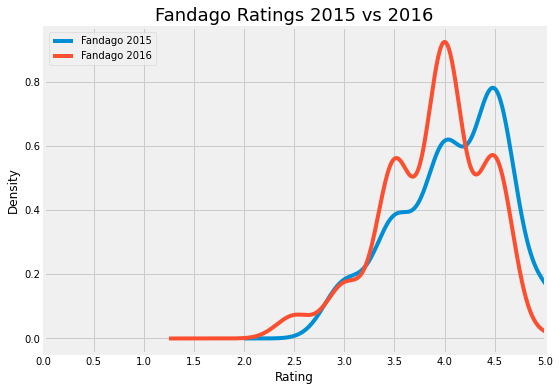

In [37]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

orig_ratings_2015['Fandango_Stars'].plot.kde(label='Fandago 2015', legend=True, figsize=(8,6),xlim=(0,5))
new_ratings_2016['fandango'].plot.kde(label='Fandago 2016', legend=True)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title('Fandago Ratings 2015 vs 2016', fontsize=18)
plt.xlabel('Stars')
plt.show()

## Observations ##

The ratings for both years are left skewed indicating that most of the reviews are favourable.

Overall Fandago ratings for both years look very similar with movies peaking at 4 stars in 2016 rather than leaning over 4 starts the year before.  Also the 2016 tail extened longer towards 1 star rating.  

We cannot conslusively say whether the difference is significant enough to attribute it to changing algorithm or rather the difference is a result of different quality of movies in 2016.




In [38]:
(orig_ratings_2015['Fandango_Stars'].value_counts(bins=5,normalize=True)*100).sort_index()

(2.9970000000000003, 3.4]     8.527132
(3.4, 3.8]                   17.829457
(3.8, 4.2]                   28.682171
(4.2, 4.6]                   37.984496
(4.6, 5.0]                    6.976744
Name: Fandango_Stars, dtype: float64

In [39]:
(new_ratings_2016['fandango'].value_counts(bins=5,normalize=True)*100).sort_index()

(2.4970000000000003, 3.0]    10.471204
(3.0, 3.5]                   24.083770
(3.5, 4.0]                   40.314136
(4.0, 4.5]                   24.607330
(4.5, 5.0]                    0.523560
Name: fandango, dtype: float64

In [40]:
from scipy.stats import percentileofscore

print(np.percentile(orig_ratings_2015['Fandango_Stars'], 50))
percentileofscore(a=orig_ratings_2015['Fandango_Stars'], score=4, kind='weak')

4.0


55.03875968992248

In [41]:
print(np.percentile(new_ratings_2016['fandango'], 50))
percentileofscore(a=new_ratings_2016['fandango'], score=4, kind='weak')

4.0


74.86910994764398

In [42]:
print('Frequency Table 2015')
print('---------------------------')
(orig_ratings_2015['Fandango_Stars'].value_counts(normalize=True)*100).sort_index()

Frequency Table 2015
---------------------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [43]:
print('Frequency Table 2016')
print('---------------------------')
(new_ratings_2016['fandango'].value_counts(normalize=True)*100).sort_index()

Frequency Table 2016
---------------------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Looking at the frequency table it is clear that 2016 ratings are more distributed towards that lower and of the scale and less toward the right end.

In other words there are more instances of movies rated 3.5 and lower and less rated 4 and higher.  

## Direction of Difference ##



In [122]:
summary_2015_16 = dict()

summary_2015_16['mean'] = [orig_ratings_2015['Fandango_Stars'].mean(),new_ratings_2016['fandango'].mean()]
summary_2015_16['median'] = [orig_ratings_2015['Fandango_Stars'].median(), new_ratings_2016['fandango'].median()]
summary_2015_16['mode'] = [orig_ratings_2015['Fandango_Stars'].mode().iloc[0], new_ratings_2016['fandango'].mode().iloc[0]] 

# df_sum_2015_16 = pd.DataFrame.from_dict(summary_2015_16, orient='index',columns=['2015','2016'])
df_sum_2015_16 = pd.DataFrame.from_dict(summary_2015_16, orient='index')
df_sum_2015_16.rename(columns={0:'2015',1:'2016'}, inplace=True)
df_sum_2015_16



,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


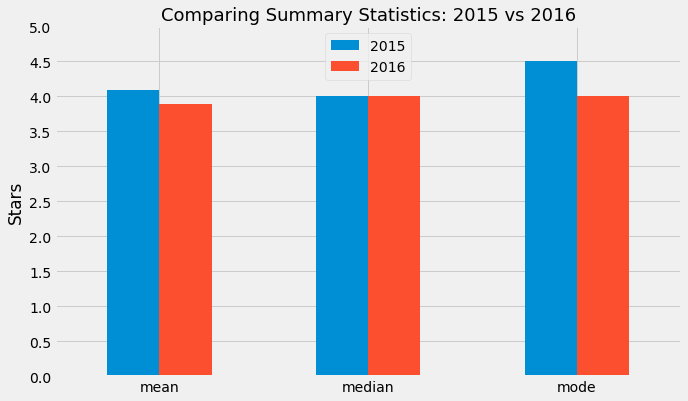

In [109]:
plt.style.use('fivethirtyeight')

plt.figsize=(18,6)
df_sum_2015_16.plot.bar(rot=0, figsize=(10,6))
plt.title('Comparing Summary Statistics: 2015 vs 2016', fontsize=18)
plt.legend(loc='upper center')
plt.yticks(np.arange(0.0, 5.5, step=0.5))
plt.ylabel('Stars')
plt.show()

In [115]:
# Calculate percentage change in mean
((df_sum_2015_16['2016']['mean']-df_sum_2015_16['2015']['mean'])/df_sum_2015_16['2015']['mean'])*100

-4.842683568951993

# Conclusion #

We can now clearly see that overall distribution has shifted to the left which is clear in key summary statistics.  Whilst most of the cases still fell within 4 stars there has been about 5% decrease in average ratings.  

This however does not answer the question for the reason of the change in ratings.  It can be because rating algorithm was adjusted.  It can also be because selection of movies in 2016 was less popular.  Or there can be some other reason.  